In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utils import make_grid, draw_n_samples_block_input

from configs import N_SIDE

# Visualise tiles

This notebook creates all the individual tiles we then use to make plots for the paper in Powerpoint.
All plots are saved into respective folders in `\figures\`. Figures can be downloaded as a folder to then fill shapes with the corresponding pictures.

In [2]:
# Turn off to protext RAM
show_bool = False
standard_quiver_scale = 47
branching_quiver_scale = 22

## Defining custom colorscale

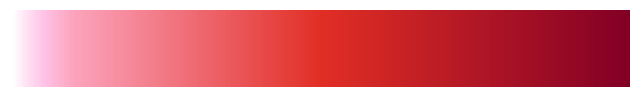

In [3]:
# pink with high sensitivity
values = np.array([0., 0.05, 0.1, 0.5, 1.])
colors = ["white", "#ffc4e8", "#fca4bd", "#e22f26", "#830025"]
error_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "error_cmap", colors = list(zip(values, colors)))

gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack([gradient] * 20)  # Make it tall enough to see

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = error_cmap)
plt.axis('off')
plt.show()

In [4]:
# Import all simulation functions
from simulate import (
    simulate_detailed_branching,
    # simulate_detailed_convergence,
    simulate_detailed_curve,
    simulate_detailed_deflection,
    simulate_detailed_edge,
    simulate_detailed_ridges,
)

# Define simulations as a dictionary with names as keys to function objects
# alphabectic order here
simulations = {
    "branching": simulate_detailed_branching,
    "curve": simulate_detailed_curve,
    "deflection": simulate_detailed_deflection,
    "edge": simulate_detailed_edge,
    "ridges": simulate_detailed_ridges,
}

In [5]:
#############
### TRAIN ###
#############

x_train = torch.load("data/sim_data/x_train_lines_discretised_0to1.pt", weights_only = False).float()

# Storage dictionaries
y_train_dict = {}

# Make y_train_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate training observations with sim_func
    y_train = sim_func(x_train)
    # Store training data in dictionary under sim_name
    y_train_dict[sim_name] = y_train 

############
### TEST ###
############

# Make x_grid
_, x_test = make_grid(n_side = N_SIDE)

# Storage dictionaries
y_test_dict = {}

# Make y_test_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate test observations
    y_test = sim_func(x_test)
    y_test_dict[sim_name] = y_test  # Store test outputs

# Ground truth

In [6]:
x_test = x_test.detach()

for (sim_name, y_train) in y_train_dict.items():

    y_test = y_test_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))

    quiver_scale = standard_quiver_scale
    if sim_name == "branching":
        quiver_scale = branching_quiver_scale
    
    # Plot ground truth test data in black
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], scale = quiver_scale, color = "black")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/gt/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Ground truth + train lines

In [7]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values)

x_train = x_train.detach()
x_test = x_test.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_test = y_test_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
    # Iterate over (9) segements:
    for i in range(0, line_segments.shape[0]):
        ax.plot(
            [line_segments[i, 0], line_segments[i, 1]], # (x_start, x_end)
            [line_segments[i, 2], line_segments[i, 3]], # (y_start, y_end)
            color = train_line_color, alpha = 0.2, linewidth = 4)
    
    # Plot ground truth test data in black
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "test")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/gt_and_train_lines/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Training vectors

In [8]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values)

x_train = x_train.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_train = y_train_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))

    quiver_scale = standard_quiver_scale
    if sim_name == "branching":
        quiver_scale = branching_quiver_scale
    
    # Plot ground truth test data in black
    ax.quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], scale = quiver_scale, color = test_color, label = "test")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/train_data/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Errors

Plot and save

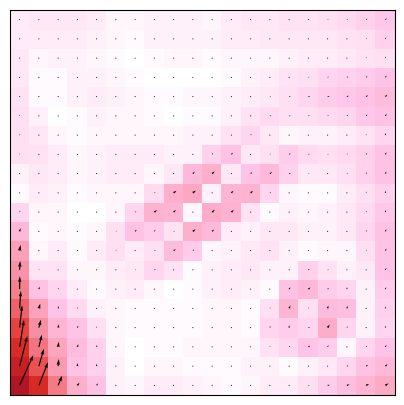

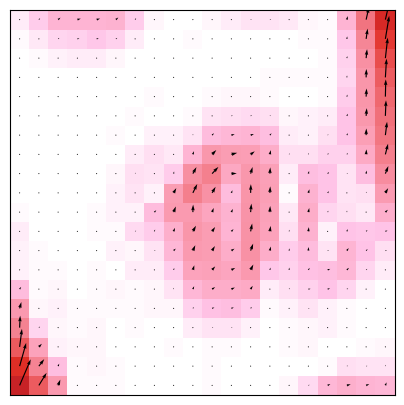

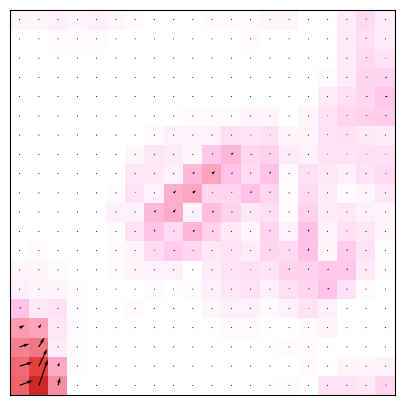

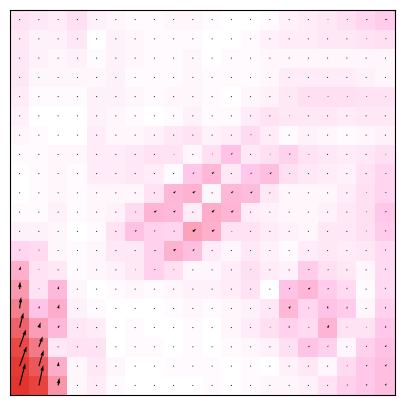

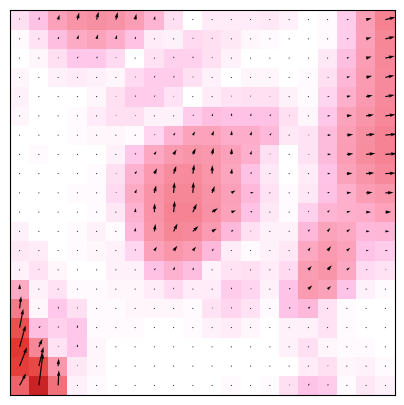

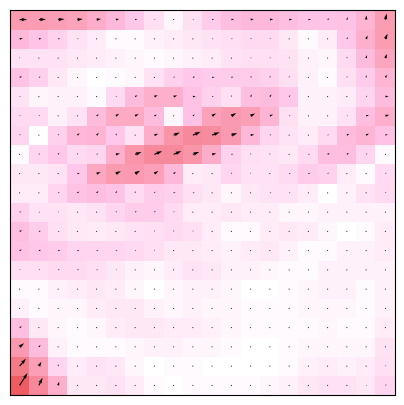

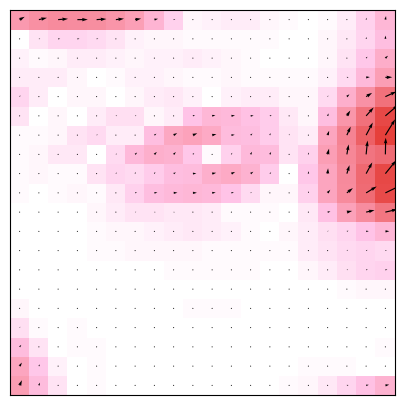

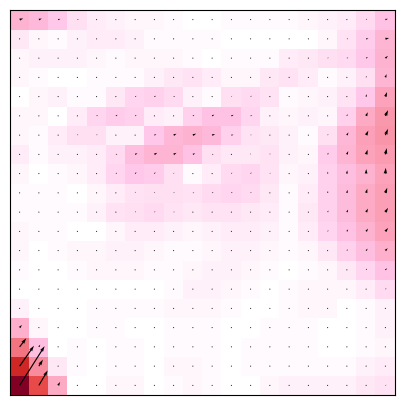

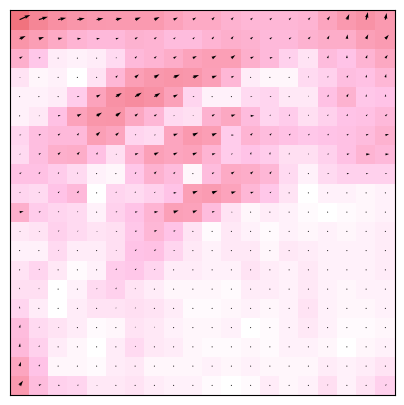

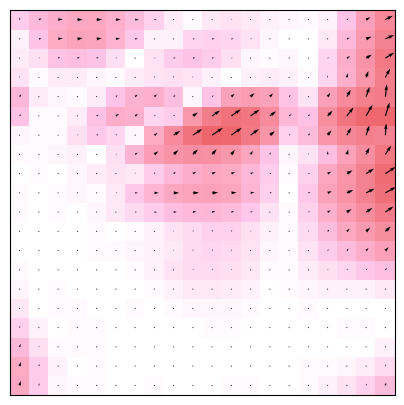

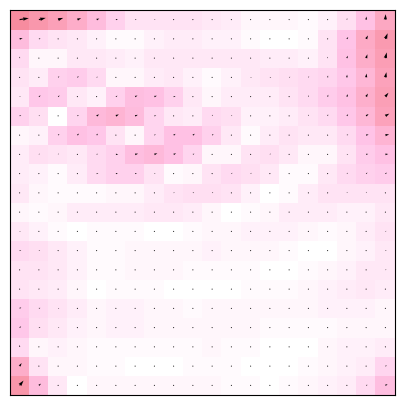

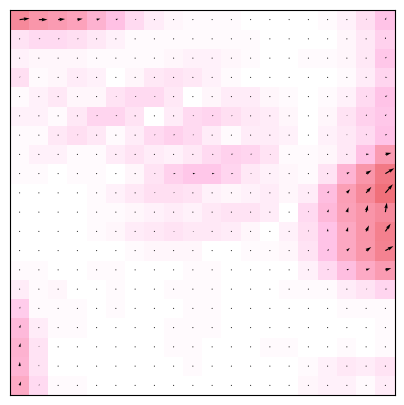

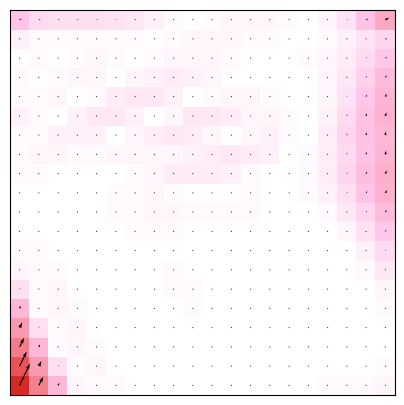

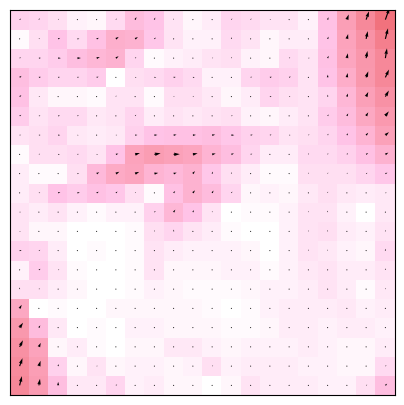

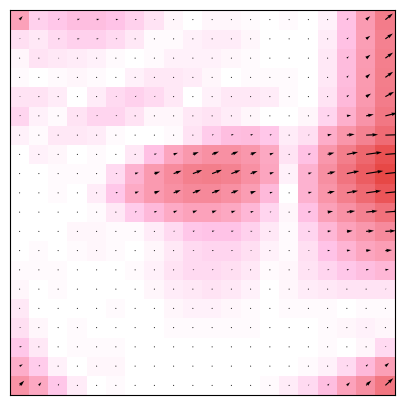

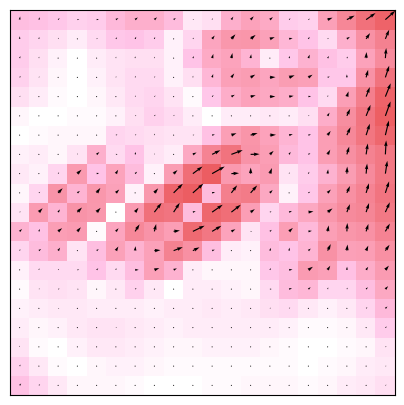

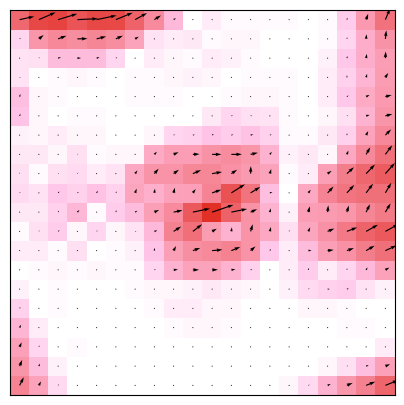

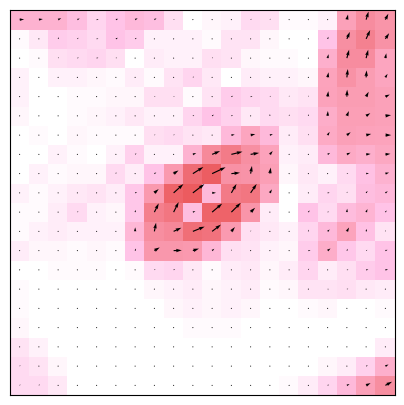

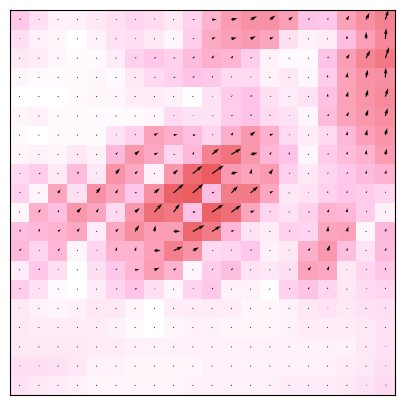

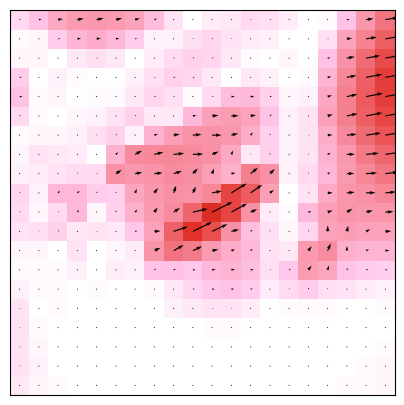

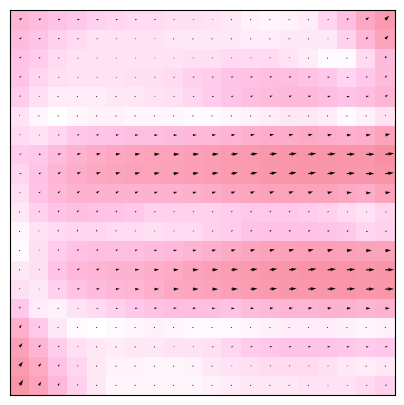

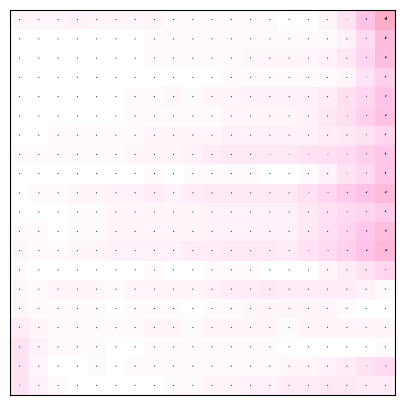

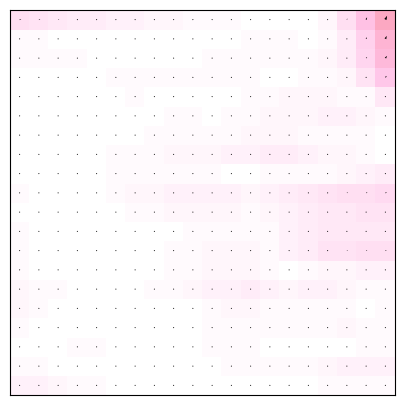

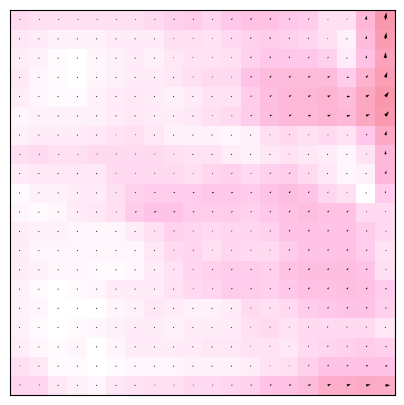

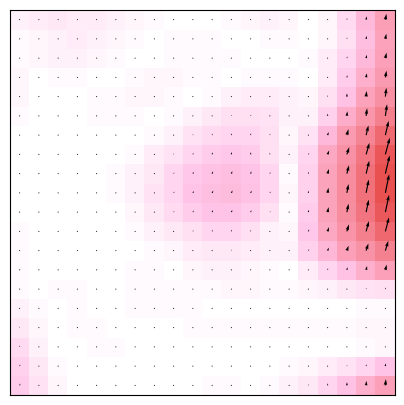

In [9]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["dfNN", "dfGP", "dfNGP", "PINN", "GP"]:
        if model_name in ["dfGP", "dfNGP", "GP"]:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_predictions.pt"

        pred = torch.load(path, weights_only = False).detach().cpu()
        error = torch.abs(pred - y_test) # shape: (N_SIDE^2, 2)
        
        # error over both dims for background color
        error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE)

        U = error[:, 0].reshape(N_SIDE, N_SIDE)  # x-component
        V = error[:, 1].reshape(N_SIDE, N_SIDE)  # y-component

        # Plot
        plt.figure(figsize = (5, 5))
        pc = plt.pcolor(X, Y, error_magnitude.detach().numpy(), cmap = error_cmap, shading = "auto", vmax = 3.0) # fixed vmax for consistency
        plt.quiver(X, Y, U, V, scale = 20, color = "black") # fixed scale for consistency
        # plt.colorbar(pc, label = "Error magnitude")
        # plt.title("Error Field with Quiver Overlay")

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/errors/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()

        plt.show()
        plt.close()

# Predictions

In [10]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["dfNN", "dfGP", "dfNGP", "PINN", "GP"]:
        if model_name in ["dfGP", "dfNGP", "GP"]:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_predictions.pt"

        pred = torch.load(path, weights_only = False).detach().cpu()

        U = pred[:, 0].reshape(N_SIDE, N_SIDE)  # x-component
        V = pred[:, 1].reshape(N_SIDE, N_SIDE)  # y-component

        # Plot
        plt.figure(figsize = (5, 5))

        quiver_scale = standard_quiver_scale
        if sim_name == "branching":
            quiver_scale = branching_quiver_scale

        plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/predictions/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Predictions with errors

In [11]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["dfNN", "dfGP", "dfNGP", "PINN", "GP"]:
        if model_name in ["dfGP", "dfNGP", "GP"]:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_predictions.pt"

        pred = torch.load(path, weights_only = False).detach().cpu()
        error = torch.abs(pred - y_test) # shape: (N_SIDE^2, 2)
        
        # error over both dims for background color
        error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE)

        # quivers are preds now
        U = pred[:, 0].reshape(N_SIDE, N_SIDE)  # x-component
        V = pred[:, 1].reshape(N_SIDE, N_SIDE)  # y-component

        # Plot
        plt.figure(figsize = (5, 5))
        pc = plt.pcolor(X, Y, error_magnitude.detach().numpy(), cmap = error_cmap, shading = "auto", vmax = 3.0) # fixed vmax for consistency
        quiver_scale = standard_quiver_scale
        if sim_name == "branching":
            quiver_scale = branching_quiver_scale

        plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency
        # plt.colorbar(pc, label = "Error magnitude")
        # plt.title("Error Field with Quiver Overlay")

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/predictions_with_errors/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Plot ground truth with same quiver scale

In [12]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")
# print(line_segments)

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values).detach()
x_test = x_test.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_test = y_test_dict[sim_name].detach()

    fig, ax = plt.subplots(1, 1, figsize = (3, 3))
    
    # Iterate over (9) segements:
    for i in range(0, line_segments.shape[0]):
        ax.plot(
            [line_segments[i, 0], line_segments[i, 1]], # (x_start, x_end)
            [line_segments[i, 2], line_segments[i, 3]], # (y_start, y_end)
            color = train_line_color, alpha = 0.2, linewidth = 4)
    
    # Plot ground truth test data in black
    quiver_scale = standard_quiver_scale
    if sim_name == "branching":
        quiver_scale = branching_quiver_scale
        
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], scale = quiver_scale, color = test_color, label = "test")

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/predictions/gt_same_quiverscale/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    if show_bool:
        plt.show()
    plt.close()

# Divergence

In [13]:
values = np.array([0.0, 0.5, 1.])
colors = ["red", "white", "blue"]
div_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "white_to_red", colors = list(zip(values, colors)))

In [14]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["GP", "PINN", "dfGP", "dfNGP"]: # "dfNN", 
        path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_prediction_divergence_field.pt"

        div = torch.load(path, weights_only = False).detach().cpu().reshape(N_SIDE, N_SIDE)

        # Plot
        plt.figure(figsize = (5, 5))
        mag = 5.0
        plt.pcolormesh(div, cmap = div_cmap, vmin = - mag, vmax = mag) # fixed scale for consistency

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/divergence/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Covariance and posterior samples

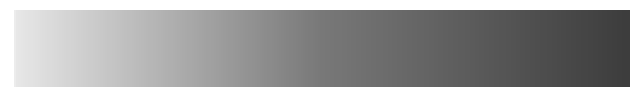

In [15]:
# Make var_cmap 
values = np.array([0.0, 0.005, 0.5, 1.0])
colors = ["white", "#e8e8e8", "#797979", "#3d3d3d"]
var_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "var_cmap", colors = list(zip(values, colors)))

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = var_cmap)
plt.axis('off')
plt.show()

In [16]:
def reshape_covar_block_to_interleaved(covar_block):
    """
    Reshape covariance block to interleaved format.
    """
    # Get the shape of the covariance block
    N_ALL = int(covar_block.shape[0] / 2)

    ### Reshape covar ###
    # extract all 4 blocks (big blocks)
    covar_uu = covar_block[:N_ALL, :N_ALL]
    covar_uv = covar_block[:N_ALL, N_ALL:]
    covar_vu = covar_block[N_ALL:, :N_ALL]
    covar_vv = covar_block[N_ALL:, N_ALL:]

    mini_blocks = torch.stack([
                torch.stack([covar_uu, covar_uv], dim = -1), # same as dim = 2, torch.Size([400, 400, 2])
                torch.stack([covar_vu, covar_vv], dim = -1) # torch.Size([400, 400, 2])
            ], dim = -1) # same as dim = 3, torch.Size([400, 400, 2, 2])
        
    # for N_ALL = 400
    mini_blocks = mini_blocks.permute(0, 2, 1, 3)  # [400, 2, 400, 2]

    # Combine first 2 dims into one and last two dims into one
    covar_interleave = mini_blocks.reshape(N_ALL * 2, N_ALL * 2)
    
    return covar_interleave

In [17]:
# 5 sims x 5 models = 25
for sim_name, sim_func in simulations.items():

    # Extract gt
    y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

    X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
    Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

    for model_name in ["GP", "dfGP", "dfNGP"]: # "dfNN", 
        mean_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
        covar_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_covar_predictions.pt"

        mean = torch.load(mean_path, weights_only = False).detach().cpu()
        covar = torch.load(covar_path, weights_only = False).detach().cpu()

        covar_interleave = reshape_covar_block_to_interleaved(covar)

        print(f"Symmetrie: {model_name} - {sim_name}", torch.allclose(covar, covar.T, atol = 1e-6))
        print(f"Symmetrie il: {model_name} - {sim_name}", torch.allclose(covar_interleave, covar_interleave.T, atol = 1e-6))
        eigvals = torch.linalg.eigvalsh(covar)
        eigvals_il = torch.linalg.eigvalsh(covar_interleave)
        print(f"Min eigenval: {model_name} - {sim_name}", eigvals.min().item())
        print(f"Min eigenval il: {model_name} - {sim_name}", eigvals_il.min().item())

        n_samples = 3
        n_sample_tensor = draw_n_samples_block_input(mean, covar, n_samples, max_jitter = 1e-1)

        ### Uncertainty ###
        var = torch.diag(covar)[:(N_SIDE * N_SIDE)].reshape(N_SIDE, N_SIDE) + torch.diag(covar)[(N_SIDE * N_SIDE):].reshape(N_SIDE, N_SIDE)

        ### Samples ###
        for i in range(n_samples):
            sample = n_sample_tensor[i]

            U = sample[:, :, 0]
            V = sample[:, :, 1]

            plt.figure(figsize = (5, 5))

            ### Plot samples ###
            quiver_scale = standard_quiver_scale
            if sim_name == "branching":
                quiver_scale = branching_quiver_scale
            plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

            plt.gca().set_aspect('equal')
            plt.gca().set_xticks([])
            plt.gca().set_yticks([])

            plt.savefig(f"figures/samples/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

            if show_bool:
                plt.show()
            plt.close()
 
            ### Plot samples with error ###
            error = torch.abs(sample.reshape(-1, 2) - y_test) # shape: (N_SIDE^2, 2)
        
            # error over both dims for background color
            error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE)

            plt.figure(figsize = (5, 5))

            plt.pcolor(X, Y, error_magnitude, cmap = error_cmap, shading = "auto", vmax = 3.0)

            quiver_scale = standard_quiver_scale
            if sim_name == "branching":
                quiver_scale = branching_quiver_scale
            
            plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

            plt.gca().set_aspect('equal')
            plt.gca().set_xticks([])
            plt.gca().set_yticks([])

            plt.savefig(f"figures/samples_with_error/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

            if show_bool:
                plt.show()
            plt.close()

            ### Plot samples with uncertainty ###

            plt.figure(figsize = (5, 5))

            mag = 0.3 # increase so it does not saturate
            plt.pcolormesh(X, Y, var, cmap = var_cmap, vmax = mag)
            quiver_scale = standard_quiver_scale
            if sim_name == "branching":
                quiver_scale = branching_quiver_scale

            plt.quiver(X, Y, U, V, scale = quiver_scale, color = "black") # fixed scale for consistency

            plt.gca().set_aspect('equal')
            plt.gca().set_xticks([])
            plt.gca().set_yticks([])

            plt.savefig(f"figures/samples_with_uncertainty/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

            if show_bool:
                plt.show()
            plt.close()

        ### Plot variance i.e. uncertainty only ###
        plt.figure(figsize = (5, 5))
        mag = 0.3 # increase so it does not saturate
        plt.pcolormesh(var, cmap = var_cmap, vmax = mag) # fixed scale for consistency, cmap = var_cmap

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/variance/{sim_name}_{model_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

Symmetrie: GP - branching True
Symmetrie il: GP - branching True
Min eigenval: GP - branching -8.093657584140601e-07
Min eigenval il: GP - branching -8.093013548204908e-07
Jitter: 1e-06
Symmetrie: dfGP - branching True
Symmetrie il: dfGP - branching True
Min eigenval: dfGP - branching -5.295267328619957e-06
Min eigenval il: dfGP - branching -1.5254905223846436
Emergency Jitter: 9.999999999999999e-06


/home/kim/ice_thickness/utils.py:148: UserWarning: Failed to make matrix positive definite. Trying work around
  warnings.warn("Failed to make matrix positive definite. Trying work around")


Symmetrie: dfNGP - branching True
Symmetrie il: dfNGP - branching True
Min eigenval: dfNGP - branching -4.503604245087445e-08
Min eigenval il: dfNGP - branching -0.08235399425029755
Jitter: 0.1
Symmetrie: GP - curve True
Symmetrie il: GP - curve True
Min eigenval: GP - curve -5.0276498768653255e-06
Min eigenval il: GP - curve -5.0383682719257195e-06
Jitter: 9.999999999999999e-06
Symmetrie: dfGP - curve True
Symmetrie il: dfGP - curve True
Min eigenval: dfGP - curve -1.8884191376855597e-05
Min eigenval il: dfGP - curve -0.54853755235672
Emergency Jitter: 1e-06
Symmetrie: dfNGP - curve True
Symmetrie il: dfNGP - curve True
Min eigenval: dfNGP - curve -1.8993605408468284e-06
Min eigenval il: dfNGP - curve -0.0032521605025976896
Jitter: 0.01
Symmetrie: GP - deflection True
Symmetrie il: GP - deflection True
Min eigenval: GP - deflection -7.785905836499296e-06
Min eigenval il: GP - deflection -7.783641194691882e-06
Jitter: 9.999999999999999e-06
Symmetrie: dfGP - deflection True
Symmetrie il

In [18]:
from metrics import compute_RMSE, compute_MAE, compute_NLL, compute_NLL_full

ImportError: cannot import name 'compute_NLL' from 'metrics' (/home/kim/ice_thickness/metrics.py)

In [ ]:
 # Extract N_FULL
N_ALL = mean.shape[0]
N_SIDE = int(np.sqrt(N_ALL))

### Reshape covar ###
# extract all 4 blocks (big blocks)
covar_uu = covar[:N_ALL, :N_ALL]
covar_uv = covar[:N_ALL, N_ALL:]
covar_vu = covar[N_ALL:, :N_ALL]
covar_vv = covar[N_ALL:, N_ALL:]

mini_blocks = torch.stack([
            torch.stack([covar_uu, covar_uv], dim = -1), # same as dim = 2, torch.Size([400, 400, 2])
            torch.stack([covar_vu, covar_vv], dim = -1) # torch.Size([400, 400, 2])
        ], dim = -1) # same as dim = 3, torch.Size([400, 400, 2, 2])
    
# for N_ALL = 400
mini_blocks = mini_blocks.permute(0, 2, 1, 3)  # [400, 2, 400, 2]

# Combine first 2 dims into one and last two dims into one
covar_interleave = mini_blocks.reshape(N_ALL * 2, N_ALL * 2)

In [ ]:
compute_NLL(y_test, mean, covar)

tensor(-2534.3569)

In [ ]:
def compute_NLL(y_true, y_mean_pred, y_covar_pred):
    """NLL quantifies how well the predicted Gaussian distribution fits the observed data.
    Sparse format: each of the N points has its own 2×2 covariance matrix.

    Args:
        y_true (torch.Size([N, 2])): true, observed vectors
        y_mean_pred (torch.Size([N, 2])): mean predictions
        y_covar_pred (torch.Size([N x 2, N x 2])): predicted covariance matrix
            if N = 400, then y_covar_pred is torch.Size([800, 800]) so 640000 elements
            N x 2 x 2 = only 1600 elements
    """
    # Extract number of points/cardinality
    N = y_true.shape[0]

    ### STEP 1:
    # We reshape y_covar_pred, the predictive covariance matrix, to a sparse format
    # Change format of y_covar_pred from (N x 2, N x 2) to (N, 2, 2) so N (2, 2) matrices:
    
    # extract diagonal of upper left quadrant: variance of the first output (y1) at each point.
    var_y1_y1 = torch.diag(y_covar_pred[:N, :N])
    # extract diagonal of ulower right quadrant: variance of the second output (y2) at each point
    var_y2_y2 = torch.diag(y_covar_pred[N:, N:])

    # extract diagonal of upper right quadrant: How much do y1 and y2 covary at this point
    covar_y1_y2 = torch.diag(y_covar_pred[:N, N:])
    # extract diagonal of lower left quadrant
    covar_y2_y1 = torch.diag(y_covar_pred[N:, :N])

    col1 = torch.cat([var_y1_y1.unsqueeze(-1), covar_y1_y2.unsqueeze(-1)], dim = -1)
    col2 = torch.cat([covar_y2_y1.unsqueeze(-1), var_y2_y2.unsqueeze(-1)], dim = -1)

    # batch tensor
    # At each point N, what is the predicted variance of y1 and y2 and what is the predicted covariance between y1 and y2? (symmetric)
    covar_N22 = torch.cat([col1.unsqueeze(-1), col2.unsqueeze(-1)], dim = -1)

    return covar_N22

In [ ]:
covar_interleave.shape

torch.allclose(K, K.T, atol = 1e-6)

torch.Size([800, 800])

In [ ]:
torch.set_printoptions(sci_mode = False)
(covar - covar.T)
(covar_interleave - covar_interleave.T)

# torch.linalg.cholesky(covar_interleave)

def safe_cholesky(K, jitter = 1e-1):
    try:
        return torch.linalg.cholesky(K)
    except RuntimeError:
        eye = torch.eye(K.size(-1), device=K.device)
        return torch.linalg.cholesky(K + jitter * eye)
    
safe_cholesky(covar_interleave)

tensor([[     0.3227,      0.0000,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        [    -0.0073,      0.3217,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        [     0.0087,     -0.0049,      0.3192,  ...,      0.0000,
              0.0000,      0.0000],
        ...,
        [     0.0001,     -0.0002,      0.0001,  ...,      0.3206,
              0.0000,      0.0000],
        [    -0.0004,      0.0003,     -0.0002,  ...,     -0.0004,
              0.3258,      0.0000],
        [     0.0001,     -0.0004,      0.0001,  ...,      0.0128,
             -0.0011,      0.3255]])

In [ ]:
def compute_NLL_full(y_true, y_mean_pred, y_covar_pred, jitter = 1e-3):
    """Computes Negative Log-Likelihood (NLL) using the full covariance matrix.

    Args:
        y_true (torch.Tensor): True observations of shape (N, 2).
        y_mean_pred (torch.Tensor): Mean predictions of shape (N, 2).
        y_covar_pred (torch.Tensor): Full predicted covariance matrix of shape (N*2, N*2).(BLOCK FORMAT)
        jitter (float, optional): Small value added to the diagonal for numerical stability. Defaults to 1e-3 - quite high.

    Returns:
        torch.Tensor: Negative Log-Likelihood (NLL) scalar.
    """
    # Number of points
    N = y_true.shape[0]
    
    # Flatten y_true and y_mean_pred to match covariance matrix shape
    # Reshape makes it [u1, v1, u2, v2, u3, v3, ...] instead of [u1, u2, u3, ..., v1, v2, v3, ...]
    y_true_flat = y_true.reshape(-1, 1)  # Shape: (N*2, 1)
    y_mean_pred_flat = y_mean_pred.reshape(-1, 1)  # Shape: (N*2, 1)

    ### STEP 1: Stabilize covariance matrix
    eps = torch.eye(y_covar_pred.shape[0], device = y_covar_pred.device) * jitter
    y_covar_pred_stable = y_covar_pred + eps  # Regularization to ensure invertibility

    ### STEP 2: Compute Mahalanobis distance efficiently
    diff = y_mean_pred_flat - y_true_flat  # Shape: (N*2, 1)
    
    # Solve Σ⁻¹ (y - μ) using Cholesky decomposition for better stability
    chol = torch.linalg.cholesky(y_covar_pred_stable)
    mahalanobis_dist = torch.cholesky_solve(diff, chol).T @ diff
    mahalanobis_dist = mahalanobis_dist.squeeze()

    ### STEP 3: Compute log-determinant robustly
    sign, log_det_Sigma = torch.linalg.slogdet(y_covar_pred_stable)
    
    # If the determinant is non-positive, return a large NLL to indicate instability
    if sign <= 0:
        return torch.tensor(float("inf"), device = y_true.device)
    
    ### STEP 4: Compute negative log-likelihood (NLL)
    d = N * 2  # Dimensionality (since we have two outputs per point)
    log_likelihood = -0.5 * (mahalanobis_dist + log_det_Sigma + d * torch.log(torch.tensor(2 * torch.pi, device = y_true.device)))

    return - log_likelihood  # Negative log-likelihood

In [ ]:
out = compute_NLL(y_test, mean, covar)

In [ ]:
torch.inverse(out)

tensor([[[  1067.9056,    585.3364],
         [   585.3365,    568.6568]],

        [[  2273.5439,   1325.4822],
         [  1325.4822,   1538.6327]],

        [[  4459.8984,   2688.9221],
         [  2688.9221,   4466.7061]],

        ...,

        [[  1845.1284,     13.2656],
         [    13.2656,    671.6944]],

        [[   599.5098,    -10.7422],
         [   -10.7422,    173.3463]],

        [[   230.2271,     -4.3043],
         [    -4.3043,     60.8186]]])

In [ ]:
torch.diagonal(covar_interleave)

torch.Size([800])

In [ ]:
var = torch.diagonal(covar_interleave)
log_var = torch.log(var)
diff = y_test.reshape(-1) - mean.reshape(-1)
diff_square = diff.square()

nll = 0.5 * (log_var + diff_square / var + torch.log(torch.tensor(2) * torch.pi))
nll.mean()

tensor(-3.1780)

In [ ]:
torch.set_printoptions(sci_mode = False)
(covar_interleave - covar_interleave.T).max()

torch.linalg.cholesky(covar_interleave + 1e-1 * torch.eye(covar_interleave.shape[0]))

tensor([[     0.3196,      0.0000,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        [    -0.0069,      0.3225,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        [     0.0042,     -0.0041,      0.3176,  ...,      0.0000,
              0.0000,      0.0000],
        ...,
        [     0.0008,      0.0001,      0.0004,  ...,      0.3208,
              0.0000,      0.0000],
        [    -0.0009,     -0.0002,     -0.0004,  ...,      0.0025,
              0.3219,      0.0000],
        [     0.0014,      0.0002,      0.0007,  ...,      0.0147,
              0.0033,      0.3281]])

In [ ]:
covar_interleave
torch.eigvals(covar_interleave)

AttributeError: module 'torch' has no attribute 'eigvals'

In [ ]:
compute_NLL_full(y_test, mean, (covar_interleave + 1e-1 * torch.eye(covar_interleave.shape[0])))

tensor(-180.0322)

# Plot mini illustrative kernel matrix 

We plot the output from the div-free kernel for the model_vis for 4 x 4 points.

In [ ]:
from kernels import divergence_free_se_kernel

# Define some random hypers here
hp_list = [torch.tensor(0.1), torch.tensor(0.1), torch.tensor([0.1, 0.12])]
kerny = divergence_free_se_kernel(x_train[0:4], x_train[0:4], hyperparameters = hp_list)

plt.figure(figsize = (5, 5))
plt.imshow(kerny.detach().numpy(), cmap = "grey", vmin = -0.5, vmax = 1.0)
plt.gca().set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig(f"figures/illustrate_covar/mini_covar_matrix.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)
plt.close()